# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import date
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

#create lists for API data
name = []
clouds = []
country = []
date = []
humidity = []
temp_max = []
lat = []
lng = []
wind_speed = []

#counter
count = 1

print(f'Retrieving Data')
print(f'----------')

#loop through saved cities
for city in cities:
    
    #try to get data responses for each city
    try:
        response = (requests.get(f"{url}&q={city}&units=imperial")).json()
        name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing City {count} of {len(cities)}. | {city}")
        
        #increase count
        count = count + 1
        
        #dont exceed api limit
#         time.sleep(1.01)
        
    except KeyError:
        print(f'City data not found. City {count} of {len(cities)}. | {city}')
        count = count + 1
        #dont exceed api limit
#         time.sleep(1.01)
print('--------------------')
print('Complete.')

Retrieving Data
----------
Processing City 1 of 591. | yellowknife
Processing City 2 of 591. | georgetown
Processing City 3 of 591. | port hardy
City data not found. City 4 of 591. | taolanaro
Processing City 5 of 591. | rikitea
Processing City 6 of 591. | mehamn
Processing City 7 of 591. | avarua
Processing City 8 of 591. | bredasdorp
Processing City 9 of 591. | matagami
Processing City 10 of 591. | port alfred
Processing City 11 of 591. | champerico
Processing City 12 of 591. | east london
City data not found. City 13 of 591. | tsihombe
City data not found. City 14 of 591. | amderma
Processing City 15 of 591. | saskylakh
Processing City 16 of 591. | cocorit
Processing City 17 of 591. | winnetka
Processing City 18 of 591. | saint-joseph
Processing City 19 of 591. | fortuna
Processing City 20 of 591. | viladecans
Processing City 21 of 591. | punta arenas
Processing City 22 of 591. | atuona
Processing City 23 of 591. | lompoc
City data not found. City 24 of 591. | talawdi
Processing Cit

Processing City 205 of 591. | genhe
Processing City 206 of 591. | ladario
Processing City 207 of 591. | araouane
City data not found. City 208 of 591. | galiwinku
Processing City 209 of 591. | baker city
Processing City 210 of 591. | mubi
Processing City 211 of 591. | aripuana
Processing City 212 of 591. | bertoua
Processing City 213 of 591. | goba
Processing City 214 of 591. | kochinda
Processing City 215 of 591. | deputatskiy
Processing City 216 of 591. | karratha
Processing City 217 of 591. | gazojak
Processing City 218 of 591. | pangnirtung
Processing City 219 of 591. | graham
Processing City 220 of 591. | obihiro
Processing City 221 of 591. | lavrentiya
Processing City 222 of 591. | rocha
Processing City 223 of 591. | jacqueville
Processing City 224 of 591. | mount gambier
Processing City 225 of 591. | dikson
Processing City 226 of 591. | akdepe
Processing City 227 of 591. | cochrane
Processing City 228 of 591. | sulangan
Processing City 229 of 591. | kamra
Processing City 230 of 

Processing City 413 of 591. | geraldton
Processing City 414 of 591. | awjilah
Processing City 415 of 591. | koulamoutou
City data not found. City 416 of 591. | labutta
Processing City 417 of 591. | nyuksenitsa
Processing City 418 of 591. | te anau
Processing City 419 of 591. | kirakira
Processing City 420 of 591. | cadiz
Processing City 421 of 591. | agadir
Processing City 422 of 591. | rock springs
Processing City 423 of 591. | acapulco
Processing City 424 of 591. | itaituba
Processing City 425 of 591. | behbahan
Processing City 426 of 591. | nuuk
Processing City 427 of 591. | benguela
Processing City 428 of 591. | adrar
Processing City 429 of 591. | cozumel
Processing City 430 of 591. | kibungo
Processing City 431 of 591. | krasnoselkup
Processing City 432 of 591. | boa vista
Processing City 433 of 591. | nhulunbuy
Processing City 434 of 591. | maua
Processing City 435 of 591. | kloulklubed
Processing City 436 of 591. | nome
City data not found. City 437 of 591. | el faiyum
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe
city_df = pd.DataFrame({'City': name,
                        'Latitude': lat,
                        'Longitude': lng,
                        'Max Temperature': temp_max,
                        'Humidity': humidity,
                        'Cloudiness': clouds,
                        'Wind Speed (mph)': wind_speed,
                        'Country': country,
                        'Date': date})

#export to csv
pd.DataFrame.to_csv(city_df, 'csv_outputs/city_weather.csv')
city_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Yellowknife,62.4560,-114.3525,46.40,39,20,10.36,CA,1620325157
1,George Town,5.4112,100.3354,80.01,88,20,4.70,MY,1620325157
2,Port Hardy,50.6996,-127.4199,55.40,54,90,14.97,CA,1620325157
3,Rikitea,-23.1203,-134.9692,76.96,71,55,9.37,PF,1620325158
4,Mehamn,71.0357,27.8492,35.60,69,20,9.22,NO,1620325158


In [5]:
stats_df = city_df
stats_df.drop(columns='City')
stats_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,22.044288,10.294883,63.826838,65.689338,51.463235,8.098419,1.620325e+09
std,32.013376,90.325319,19.575134,23.884795,36.527526,5.011102,8.276959e+01
min,-54.800000,-175.200000,2.280000,4.000000,0.000000,0.270000,1.620325e+09
25%,-3.162975,-67.261975,49.747500,50.000000,20.000000,4.470000,1.620325e+09
50%,26.908300,14.022550,66.110000,70.000000,51.000000,7.000000,1.620325e+09
75%,47.735375,82.901250,79.620000,86.000000,88.250000,10.545000,1.620325e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,30.220000,1.620325e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#nothing is over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

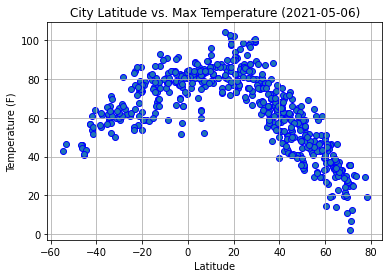

In [11]:
plt.scatter(city_df['Latitude'],city_df['Max Temperature'],edgecolors='b')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('plots/lat_temp.png',bbox_inches= 'tight')

## Latitude vs. Humidity Plot

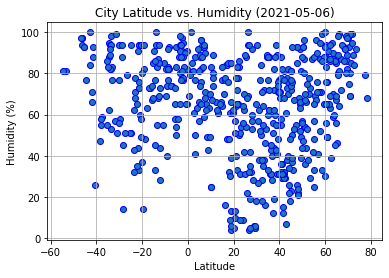

In [12]:
plt.scatter(city_df['Latitude'],city_df['Humidity'],edgecolors='b')
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('plots/lat_temp.png',bbox_inches= 'tight')

## Latitude vs. Cloudiness Plot

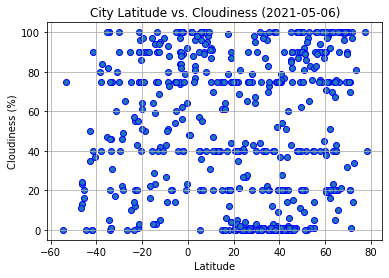

In [13]:
plt.scatter(city_df['Latitude'],city_df['Cloudiness'],edgecolors='b')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('plots/lat_temp.png',bbox_inches= 'tight')

## Latitude vs. Wind Speed Plot

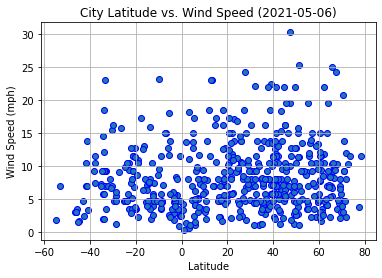

In [14]:
plt.scatter(city_df['Latitude'],city_df['Wind Speed (mph)'],edgecolors='b')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('plots/lat_temp.png',bbox_inches= 'tight')

## Linear Regression

In [15]:
#define hemispheres
north_df = city_df.loc[city_df['Latitude'] > 0]
south_df = city_df.loc[city_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8630870868903608.


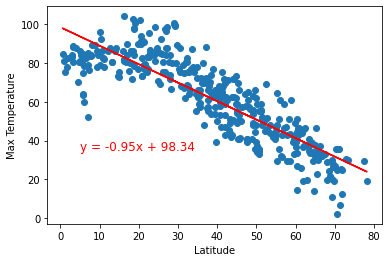

In [19]:
x = north_df['Latitude']
y = north_df['Max Temperature']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line,(5,35),fontsize=12,color="red")
plt.savefig('plots/north_temp.png',bbox_inches= 'tight')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.724946698017977.


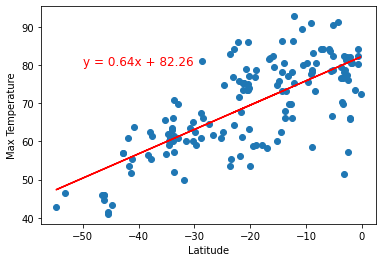

In [20]:
x = south_df['Latitude']
y = south_df['Max Temperature']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line,(-50,80),fontsize=12,color="red")
plt.savefig('plots/south_temp.png',bbox_inches= 'tight')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1829173577633728.


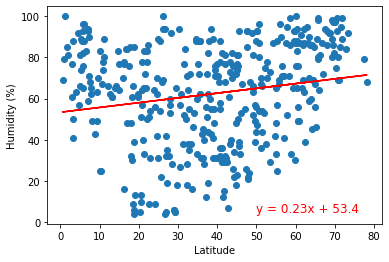

In [21]:
x = north_df['Latitude']
y = north_df['Humidity']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line,(50,5),fontsize=12,color="red")
plt.savefig('plots/north_humid.png',bbox_inches= 'tight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.008983719372767717.


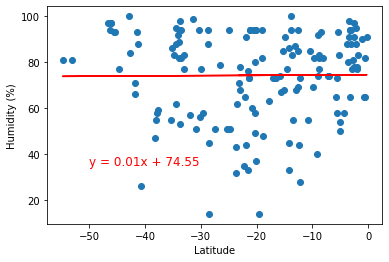

In [22]:
x = south_df['Latitude']
y = south_df['Humidity']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line,(-50,35),fontsize=12,color="red")
plt.savefig('plots/south_humid.png',bbox_inches= 'tight')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10712686479258456.


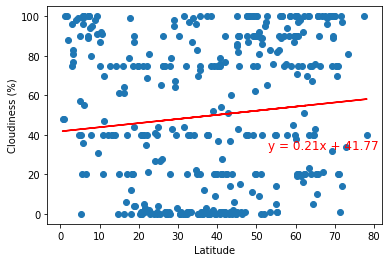

In [23]:
x = north_df['Latitude']
y = north_df['Cloudiness']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line,(53,33),fontsize=12,color="red")
plt.savefig('plots/north_cloud.png',bbox_inches= 'tight')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3273967412476334.


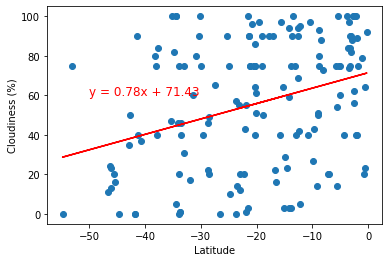

In [24]:
x = south_df['Latitude']
y = south_df['Cloudiness']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line,(-50,60),fontsize=12,color="red")
plt.savefig('plots/south_cloud.png',bbox_inches= 'tight')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.027485074738764388.


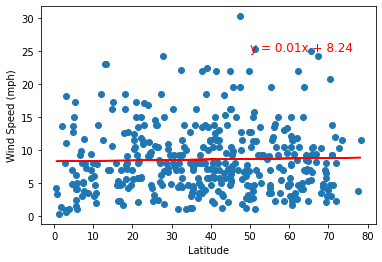

In [25]:
x = north_df['Latitude']
y = north_df['Wind Speed (mph)']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line,(50,25),fontsize=12,color="red")
plt.savefig('plots/north_wind.png',bbox_inches= 'tight')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.05626483943782775.


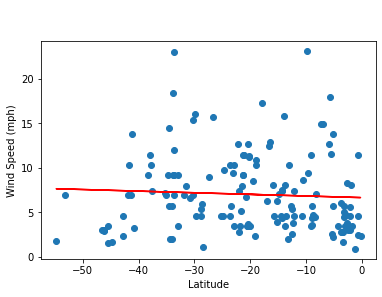

In [26]:
x = south_df['Latitude']
y = south_df['Wind Speed (mph)']

#linregress
(m,b,r,p,std) = st.linregress(x,y)
print(f'The r-value is: {r}.')

line_values = m*x + b
line = (f'y = {round(m,2)}x + {round(b,2)}')

#plot
plt.scatter(x,y)
plt.plot(x,line_values,'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line,(-50,27),fontsize=12,color="red")
plt.savefig('plots/south_wind.png',bbox_inches= 'tight')